# Lesson 5 Using Early Stopping to Prevent Overfitting in Gradient Boosting Models

Here's the markdown version of the provided lesson:

---

## Lesson Overview

Hello and welcome! In today's lesson, we will explore the practice of **Using Early Stopping to Prevent Overfitting**. This technique is essential in ensuring that your gradient boosting models stay robust and accurate. We will introduce early stopping, revise data preparation steps, implement early stopping in a gradient boosting model, evaluate its performance, and visualize the predictions vs. actual values.

By the end of this lesson, you will understand how to effectively use early stopping to manage overfitting in your models, especially within the context of financial data.

## Introduction to Early Stopping

**Early stopping** is a regularization technique used to prevent overfitting in machine learning models, particularly those that learn iteratively, like gradient boosting models. It works by monitoring the model's performance on a validation set during training and halting the training process when no significant improvement is observed over a specified number of iterations.

Overfitting occurs when a model learns the noise in the training data rather than the actual signal, resulting in poor generalization to new, unseen data. Early stopping can help mitigate this by terminating the training process before the model becomes too specialized in the training data.

### Why Early Stopping?
- It enhances model generalization.
- Reduces training time by halting unproductive iterations.
- Helps manage resources efficiently.

## Revising Data Preparation Steps

Given that you already know how to load, prepare, and scale features, let's do a quick revision. We'll use the `load_dataset` function to load the TSLA dataset, create new features, and standardize them.

```python
import pandas as pd
from datasets import load_dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load TSLA dataset
tesla = load_dataset('codesignal/tsla-historic-prices')
tesla_df = pd.DataFrame(tesla['train'])

# Convert Date column to datetime type
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

# Feature Engineering
tesla_df['Prev_Close'] = tesla_df['Adj Close'].shift(1)
tesla_df['Day_Pct_Change'] = (tesla_df['Adj Close'] - tesla_df['Prev_Close']) / tesla_df['Prev_Close'] * 100
tesla_df['SMA_5'] = tesla_df['Adj Close'].rolling(window=5).mean()
tesla_df['SMA_10'] = tesla_df['Adj Close'].rolling(window=10).mean()
tesla_df['EMA_5'] = tesla_df['Adj Close'].ewm(span=5, adjust=False).mean()
tesla_df['EMA_10'] = tesla_df['Adj Close'].ewm(span=10, adjust=False).mean()
tesla_df.dropna(inplace=True)

# Select features and target
features = tesla_df[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_5', 'SMA_10', 'EMA_5', 'EMA_10']].values
target = tesla_df['Day_Pct_Change'].values

# Standardizing features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.25, random_state=42)
```

Here, we load the dataset, create new features (previous close, day percentage change, simple moving averages, exponential moving averages), and standardize features. Finally, we split the dataset into training and testing sets.

## Implementing Early Stopping in Gradient Boosting

Let's now incorporate early stopping into our Gradient Boosting model. The essential parameters for early stopping include `validation_fraction`, `n_iter_no_change`, and `tol`.

- **validation_fraction:** The fraction of the data to be used as a validation set for early stopping.
- **n_iter_no_change:** Number of iterations with no improvement to wait before stopping the training.
- **tol:** The minimum improvement to be considered significant.

Here's how we instantiate and train the model with early stopping:

```python
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model with early stopping
model = GradientBoostingRegressor(n_estimators=100, validation_fraction=0.1, 
                                  n_iter_no_change=5, tol=0.01, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
```

## Evaluating Model Performance with and without Early Stopping

We'll use Mean Squared Error (MSE) to evaluate our model's performance. Lower MSE values indicate better model performance. Let's compare the MSE values with and without early stopping.

First, we'll calculate the MSE for our model with early stopping:

```python
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error with Early Stopping:", mse)
# Output:
# Mean Squared Error with Early Stopping: 12.433090244316602
```

This output indicates the model's average squared difference between the estimated values and the actual value, providing a simple measure of the model's prediction accuracy.

Now, let's train a model without early stopping and compare the MSE:

```python
# Instantiate the model without early stopping
model_no_stop = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model
model_no_stop.fit(X_train, y_train)

# Predict and evaluate
predictions_no_stop = model_no_stop.predict(X_test)
mse_no_stop = mean_squared_error(y_test, predictions_no_stop)
print("Mean Squared Error without Early Stopping:", mse_no_stop)
# Output:
# Mean Squared Error without Early Stopping: 11.456288894627543
```

This result shows that the model without early stopping performed slightly better in this instance, but this might vary with different datasets and model parameters. It's essential to evaluate models comprehensively before choosing the best approach.

## Visualizing Predictions vs. Actual Values

Visualizing the predictions against the actual values helps in understanding how well the model performs. Let's plot these values for our model with early stopping.

```python
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.7)
plt.scatter(range(len(y_test)), predictions, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values with Early Stopping')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()
```
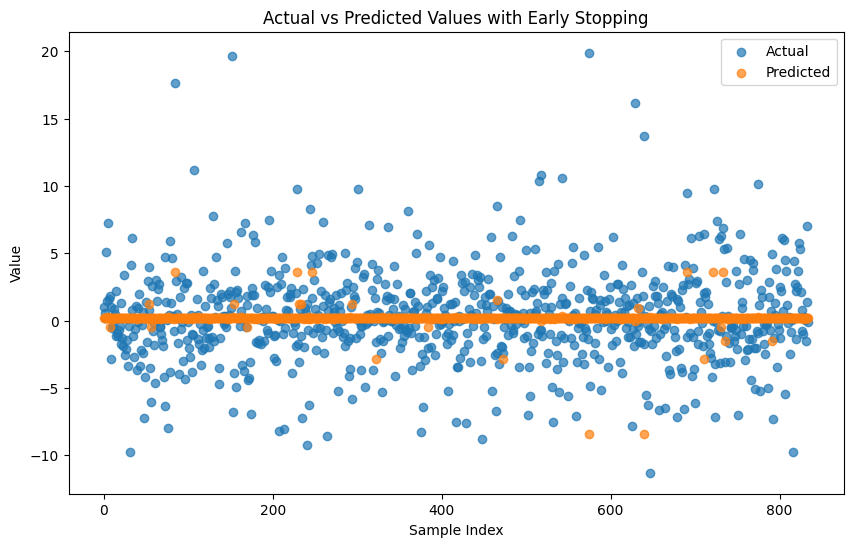

And for comparison, let's also visualize the predictions from the model without early stopping:

```python
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.7)
plt.scatter(range(len(y_test)), predictions_no_stop, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values without Early Stopping')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()
```
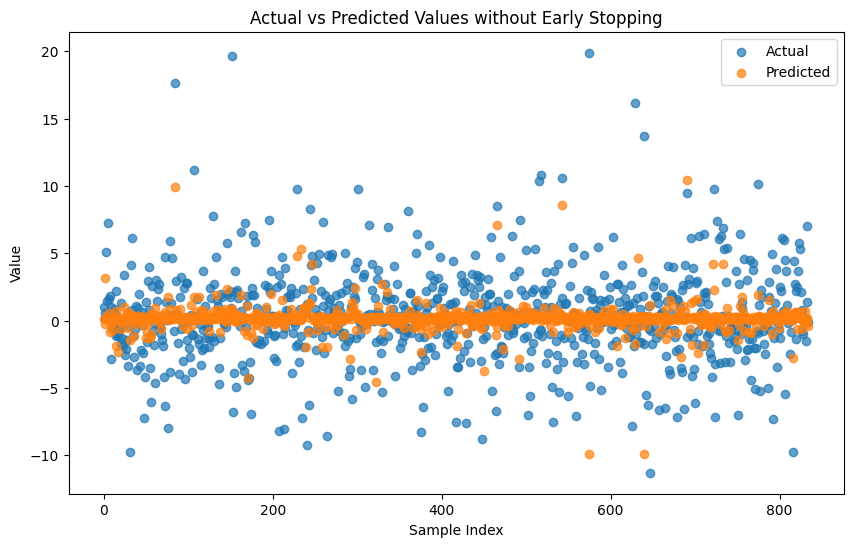

## Lesson Summary

In this lesson, we explored how early stopping can prevent overfitting in gradient boosting models. We revised essential steps of data preparation, implemented early stopping, evaluated model performance using Mean Squared Error, and visualized the predictions. Early stopping helps improve the model's generalization ability and prevents wasting computational resources on unnecessary iterations.

Next, you will practice applying early stopping to your predictive models. This hands-on practice will solidify your understanding and enhance your skill set in machine learning for financial trading. Happy learning!

---

## Apply Early Stopping Parameters to Model

Let's modify the starter code to adjust the early stopping parameters as per your requirements. Here's the modified code:

```python
import pandas as pd
from datasets import load_dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load TSLA dataset
tesla = load_dataset('codesignal/tsla-historic-prices')
tesla_df = pd.DataFrame(tesla['train'])

# Convert Date column to datetime type
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

# Feature Engineering
tesla_df['Prev_Close'] = tesla_df['Adj Close'].shift(1)
tesla_df['Day_Pct_Change'] = (tesla_df['Adj Close'] - tesla_df['Prev_Close']) / tesla_df['Prev_Close'] * 100
tesla_df['SMA_5'] = tesla_df['Adj Close'].rolling(window=5).mean()
tesla_df['SMA_10'] = tesla_df['Adj Close'].rolling(window=10).mean()
tesla_df['EMA_5'] = tesla_df['Adj Close'].ewm(span=5, adjust=False).mean()
tesla_df['EMA_10'] = tesla_df['Adj Close'].ewm(span=10, adjust=False).mean()
tesla_df.dropna(inplace=True)

# Select features and target
features = tesla_df[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_5', 'SMA_10', 'EMA_5', 'EMA_10']].values
target = tesla_df['Day_Pct_Change'].values

# Standardizing features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.25, random_state=42)

# Instantiate the model with adjusted early stopping parameters
model = GradientBoostingRegressor(n_estimators=100, validation_fraction=0.1, 
                                  n_iter_no_change=5, tol=0.01, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)

# Calculate MSE with early stopping
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error with Early Stopping:", mse)

# Visualizing predictions with early stopping
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.7)
plt.scatter(range(len(y_test)), predictions, label="Predicted", alpha=0.7)
plt.title("Actual vs Predicted Values with Early Stopping")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.show()
```

### Kesimpulan
Kode di atas telah dimodifikasi untuk mengatur parameter early stopping pada model `GradientBoostingRegressor`. Pengaturan `validation_fraction=0.1`, `n_iter_no_change=5`, dan `tol=0.01` akan mempengaruhi kinerja model dengan cara menghentikan pelatihan jika tidak ada peningkatan yang signifikan dalam validasi setelah 5 iterasi berturut-turut, dengan toleransi error 0.01. Hal ini penting untuk mengoptimalkan penggunaan model dengan meminimalkan overfitting dan menghemat waktu komputasi.

## Incorporate Early Stopping and Visualization in Gradient Boosting

Let's fill in the missing parts of the code to incorporate early stopping in the `GradientBoostingRegressor` model and visualize the prediction results.

Here's the complete code:

```python
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import datasets

# Load TSLA dataset
tesla = datasets.load_dataset('codesignal/tsla-historic-prices')
tesla_df = pd.DataFrame(tesla['train'])
# tesla = datasets.load_dataset('codesignal/tsla-historic-prices')

# Convert Date column to datetime type
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

# Create new features: Previous Close, Day Percentage Change, High-Low Spread, Close-Prev Close Ratio
tesla_df['Prev_Close'] = tesla_df['Adj Close'].shift(1)
tesla_df['Day_Pct_Change'] = (tesla_df['Adj Close'] - tesla_df['Prev_Close']) / tesla_df['Prev_Close'] * 100
tesla_df['High_Low_Spread'] = tesla_df['High'] - tesla_df['Low']
tesla_df['Close_Prev_Close_Ratio'] = tesla_df['Adj Close'] / tesla_df['Prev_Close']

# Drop any rows with missing values (caused by shift operations)
tesla_df.dropna(inplace=True)

# Select features and target
features = tesla_df[['Open', 'High', 'Low', 'Close', 'Volume', 'High_Low_Spread','Close_Prev_Close_Ratio']].values
target = tesla_df['Day_Pct_Change'].values

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.25, random_state=42)

# Instantiate the Gradient Boosting model with early stopping
model_with_early_stopping = GradientBoostingRegressor(n_estimators=100, validation_fraction=0.1, 
                                                      n_iter_no_change=5, tol=0.01, random_state=42)

# Fit the model with early stopping
model_with_early_stopping.fit(X_train, y_train)

# Make predictions and evaluate the model using Mean Squared Error (MSE) with early stopping
predictions_with_early_stopping = model_with_early_stopping.predict(X_test)
mse_with_early_stopping = mean_squared_error(y_test, predictions_with_early_stopping)
print("Mean Squared Error with Early Stopping:", mse_with_early_stopping)

# Instantiate the Gradient Boosting model without early stopping for comparison
model_without_early_stopping = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model without early stopping
model_without_early_stopping.fit(X_train, y_train)

# Make predictions and evaluate the model using Mean Squared Error (MSE) without early stopping
predictions_without_early_stopping = model_without_early_stopping.predict(X_test)
mse_without_early_stopping = mean_squared_error(y_test, predictions_without_early_stopping)
print("Mean Squared Error without Early Stopping:", mse_without_early_stopping)

# Visualize predictions vs. actual values with early stopping
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.7)
plt.scatter(range(len(y_test)), predictions_with_early_stopping, label='Predicted with Early Stopping', alpha=0.7)
plt.title('Actual vs Predicted Values with Early Stopping')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Visualize predictions vs. actual values without early stopping
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.7)
plt.scatter(range(len(y_test)), predictions_without_early_stopping, label='Predicted without Early Stopping', alpha=0.7)
plt.title('Actual vs Predicted Values without Early Stopping')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

```

### Explanation of Added Lines:
1. **Model Instantiation:**
   ```python
   model = GradientBoostingRegressor(n_estimators=100, validation_fraction=0.1, 
                                     n_iter_no_change=5, tol=0.01, random_state=42)
   ```
   - **`validation_fraction=0.1`:** Uses 10% of the training data as validation data to monitor overfitting.
   - **`n_iter_no_change=5`:** Stops training if there's no improvement in the validation loss for 5 consecutive iterations.
   - **`tol=0.01`:** The tolerance for early stopping; if the improvement is less than this threshold, training stops.

2. **Model Training:**
   ```python
   model.fit(X_train, y_train)
   ```

3. **Prediction:**
   ```python
   predictions = model.predict(X_test)
   ```

4. **Visualization:**
   ```python
   plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.7)
   plt.scatter(range(len(y_test)), predictions, label='Predicted', alpha=0.7)
   plt.title('Actual vs Predicted Values with Early Stopping')
   plt.xlabel('Sample Index')
   plt.ylabel('Value')
   plt.legend()
   plt.show()
   ```

### Kesimpulan
Kode ini sudah lengkap dengan penerapan early stopping pada model `GradientBoostingRegressor`. Hasil visualisasi akan menampilkan perbandingan antara nilai aktual dan prediksi dengan konfigurasi early stopping. Ini berguna untuk mengidentifikasi apakah model telah dioptimalkan atau masih perlu perbaikan lebih lanjut. Teruslah menjelajahi pengetahuan ini! 🚀